In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))

from source.generator.change_point_generator import ChangePointGenerator

# Create two data streams

In [2]:
# Data Stream 1 - Sudden Shift
generator1 = ChangePointGenerator(num_segments=3, 
                                 segment_length=1000, 
                                 change_point_type='sudden_shift', 
                                 seed=2)
generator1.generate_data()
data_stream1 = generator1.get_data()

# Data Stream 2 - Sudden Shift
generator2 = ChangePointGenerator(num_segments=6,
                                 segment_length=500, 
                                 change_point_type='sudden_shift', 
                                 seed=11)
generator2.generate_data()
data_stream2 = generator2.get_data()

# List of Data Streams
list_data_streams = [data_stream1, data_stream2]

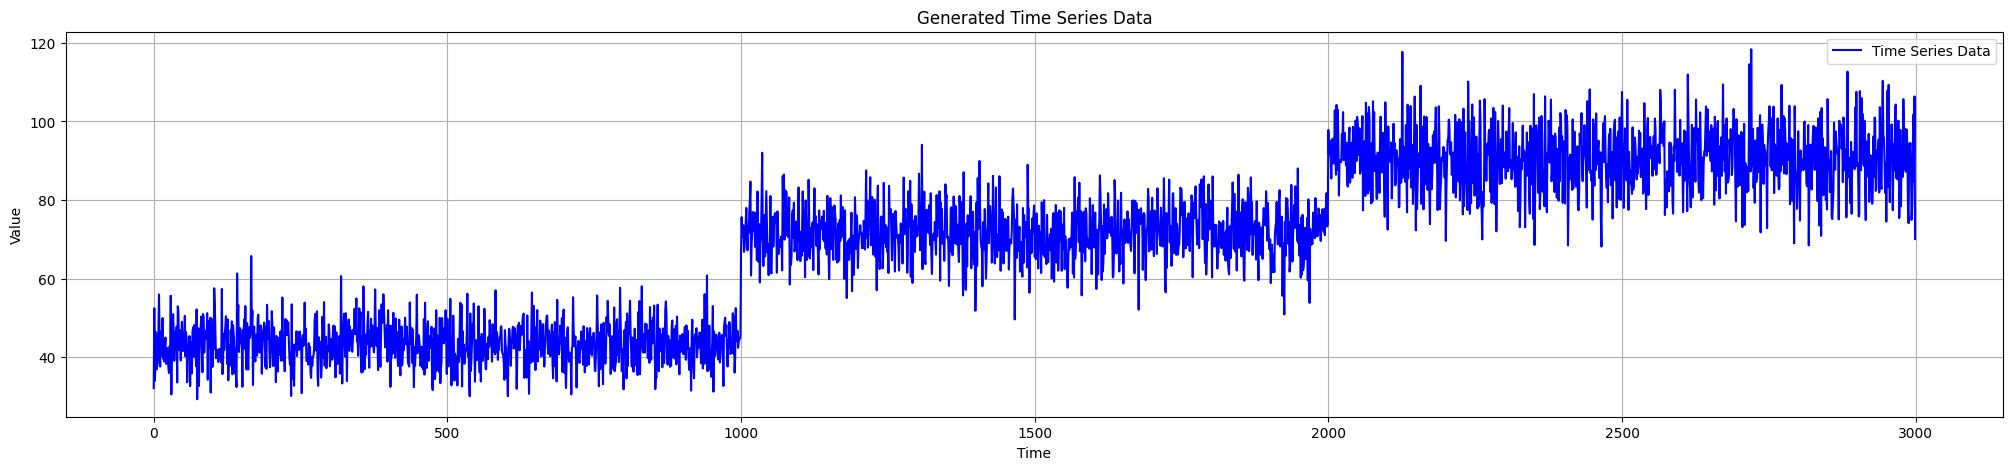

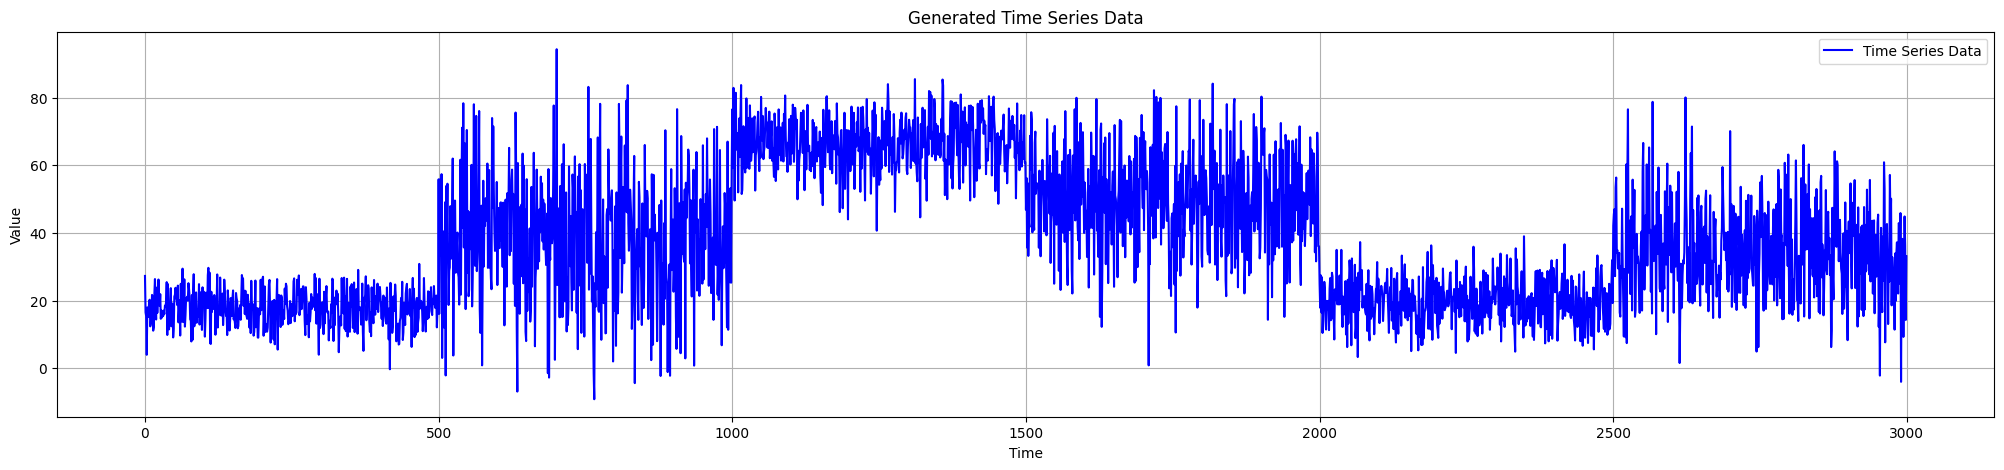

In [3]:
generator1.plot_data()

generator2.plot_data()

In [4]:
from source.detector.mcusum import OneShotCusum

oneshot_cusum = OneShotCusum(detector_name='cusum',
                  warmup_period=300, 
                  delta=1, 
                  threshold=4)

data_streams_results = oneshot_cusum.offline_detection(list_data_streams)

2025-12-11 12:11:17.533 | INFO     | source.detector.mcusum:offline_detection:13 - Starting offline detection for stream 1
2025-12-11 12:11:17.544 | INFO     | source.detector.mcusum:offline_detection:17 - Change points detected at: [1001 1925]
2025-12-11 12:11:17.544 | INFO     | source.detector.mcusum:offline_detection:19 - Finished offline detection

2025-12-11 12:11:17.545 | INFO     | source.detector.mcusum:offline_detection:13 - Starting offline detection for stream 2
2025-12-11 12:11:17.553 | INFO     | source.detector.mcusum:offline_detection:17 - Change points detected at: [   0  500 1003 1502 2003 2501]
2025-12-11 12:11:17.553 | INFO     | source.detector.mcusum:offline_detection:19 - Finished offline detection



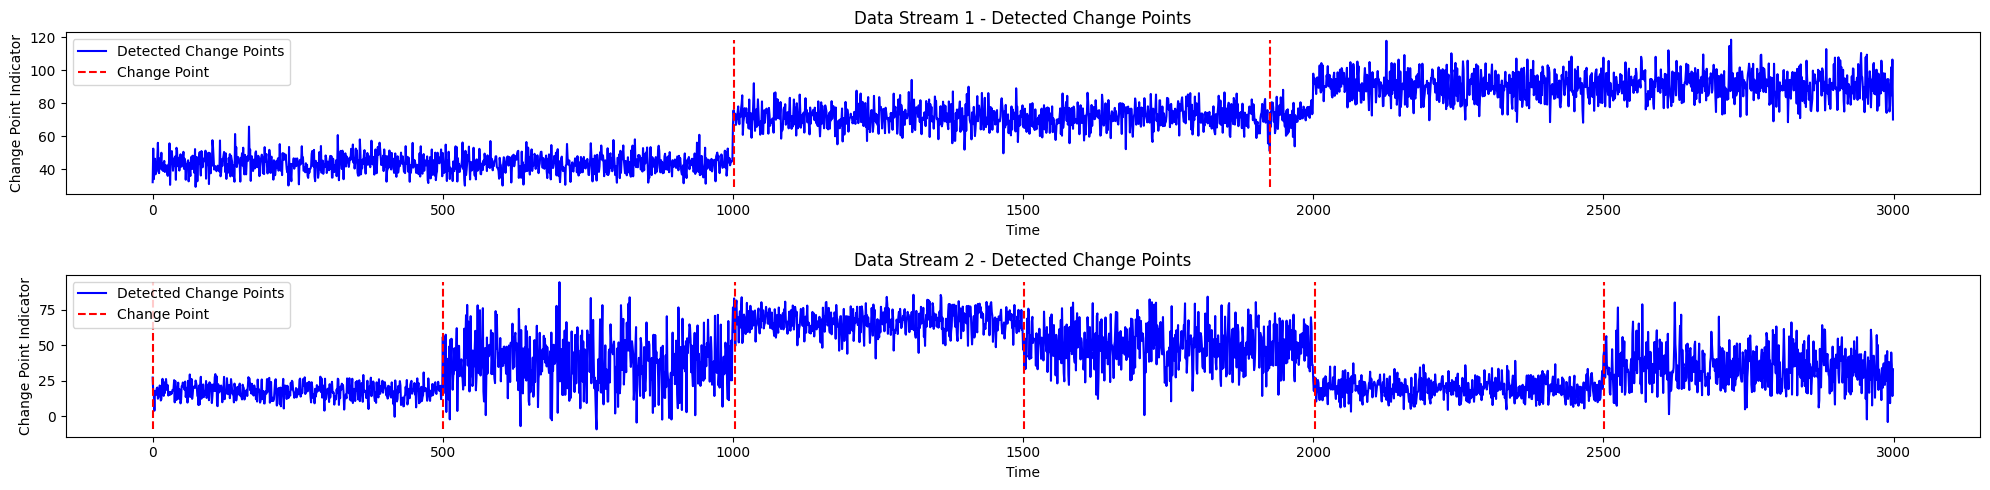

In [5]:
oneshot_cusum.plots_detection_many_streams(list_data_streams)